In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import numpy as np

In [ ]:
#pip install ISLP

In [2]:
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize ,
poly)

## Load the data

In [3]:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')

# Read in red wine data
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

In [4]:
white['wine_type']='white'
red['wine_type']='red'
cmb_wine_data=pd.concat([white,red])

In [7]:
cmb_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [8]:
cmb_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [17]:
##Convert the response variable as a binary variable

In [9]:
cmb_wine_data['wine_type_res']= np.where(cmb_wine_data['wine_type']=="white",1,0)

##Training and testing a logistic regression model

In [11]:
X=cmb_wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]

In [12]:
y=cmb_wine_data[['wine_type_res']]
X=X.to_numpy()
y=y.to_numpy()


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

In [14]:

modl_glm=sm.GLM(y_train, X_train,family=sm.families.Binomial())
res=modl_glm.fit()
summarize(res)

,coef,std err,z,P>|z|
x1,-1.5158,0.155,-9.778,0.000
x2,-12.6146,1.079,-11.694,0.000
x3,1.0828,1.127,0.961,0.337
x4,0.0846,0.057,1.498,0.134
x5,-31.8546,3.926,-8.114,0.000
x6,-0.0654,0.015,-4.445,0.000
x7,0.0715,0.006,12.874,0.000
x8,45.8872,4.365,10.513,0.000
x9,-9.6932,1.015,-9.551,0.000
x10,-8.7883,1.026,-8.568,0.000


In [ ]:
y_pred_glm=res.predict(X_test)
y_pred_glm_bin=np.where(y_pred_glm>=0.5,1,0)
y_pred_glm_bin

array([1, 1, 1, ..., 0, 0, 0])

#Results based on the test data

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred=y_pred_glm_bin, y_true=y_test)

array([[301,  13],
       [  6, 980]])

#train a random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
feature_names = [f"feature {i}" for i in range(X.shape[1])]
rf=RandomForestClassifier(n_estimators=5,random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

<ipython-input-65-07a978c75885>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [ ]:
y_pred=rf.predict(X_test)

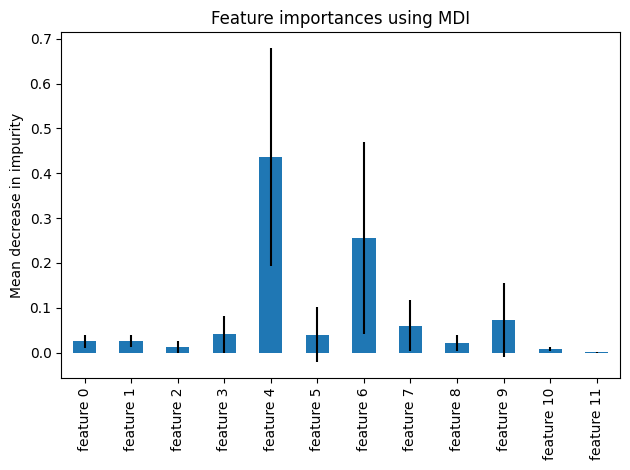

In [ ]:
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[308,   6],
       [  9, 977]])